In [1]:
from src import data_catalog
from src import tseries_mod
from src.utils_plot import plot_1ds

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')
varnames = ['FG_CO2', 'DIC_RIV_FLUX', 'DOC_RIV_FLUX', 'DOCr_RIV_FLUX', 'ALK_RIV_FLUX', 'pocToSed', 'calcToSed',
            'FvPER_DIC', 'FvICE_DIC', 'FvPER_ALK', 'FvICE_ALK']
drop_varnames = ['DIC_RIV_FLUX', 'DOC_RIV_FLUX', 'DOCr_RIV_FLUX', 'pocToSed', 'calcToSed',
                 'FvPER_DIC', 'FvICE_DIC', 'FvPER_ALK', 'FvICE_ALK']
regions = ['Global', 'SouOce (90S-30S)']

active catalog: experiments


In [3]:
def ocean_carbon_balance_summary(experiment):
    ds_ann = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment, freq='ann')

    ds_ann['Ctot_RIV_FLUX'] = ds_ann.DIC_RIV_FLUX + ds_ann.DOC_RIV_FLUX + ds_ann.DOCr_RIV_FLUX

    ds_ann['CtotToSed'] = ds_ann.pocToSed + ds_ann.calcToSed

    ds_ann['AlkToSed'] = 2 * ds_ann.calcToSed

    ds_ann['FvTOT_DIC'] = ds_ann.FvPER_DIC + ds_ann.FvICE_DIC

    ds_ann['FvTOT_ALK'] = ds_ann.FvPER_ALK + ds_ann.FvICE_ALK

    for region in regions:
        print(ds_ann.drop(drop_varnames).mean('time').sel(region=region))
        title = ' '.join([experiment, region])
        plot_1ds(ds_ann, ['FG_CO2'], title=title, region_val=region)
        plot_1ds(ds_ann, ['Ctot_RIV_FLUX', 'CtotToSed'], title=title, region_val=region)
        plot_1ds(ds_ann, ['ALK_RIV_FLUX', 'AlkToSed'], title=title, region_val=region)
        plot_1ds(ds_ann, ['FvTOT_DIC'], title=title, region_val=region)

<xarray.Dataset>
Dimensions:                   ()
Coordinates:
    region                    <U6 'Global'
Data variables:
    FG_CO2                    float32 -0.044479623
    weight_sum_FG_CO2         float64 3.605e+18
    weight_sum_DIC_RIV_FLUX   float64 3.605e+18
    weight_sum_DOC_RIV_FLUX   float64 3.605e+18
    weight_sum_DOCr_RIV_FLUX  float64 3.605e+18
    ALK_RIV_FLUX              float32 0.25683656
    weight_sum_ALK_RIV_FLUX   float64 3.605e+18
    weight_sum_pocToSed       float64 3.605e+18
    weight_sum_calcToSed      float64 3.605e+18
    weight_sum_FvPER_DIC      float64 3.605e+18
    weight_sum_FvICE_DIC      float64 3.605e+18
    weight_sum_FvPER_ALK      float64 3.605e+18
    weight_sum_FvICE_ALK      float64 3.605e+18
    Ctot_RIV_FLUX             float32 0.43811038
    CtotToSed                 float32 0.44047192
    AlkToSed                  float32 0.2786
    FvTOT_DIC                 float32 -0.0004114397
    FvTOT_ALK                 float32 -0.0004709092
<xa

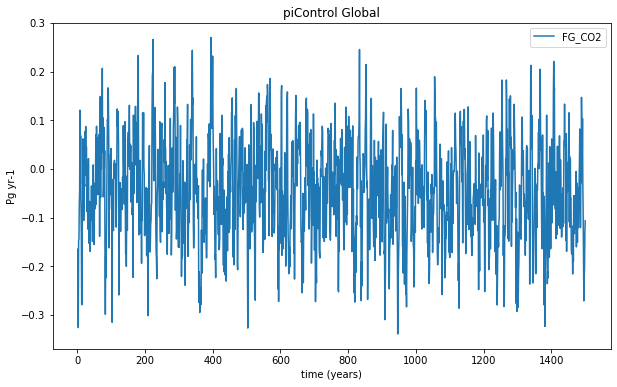

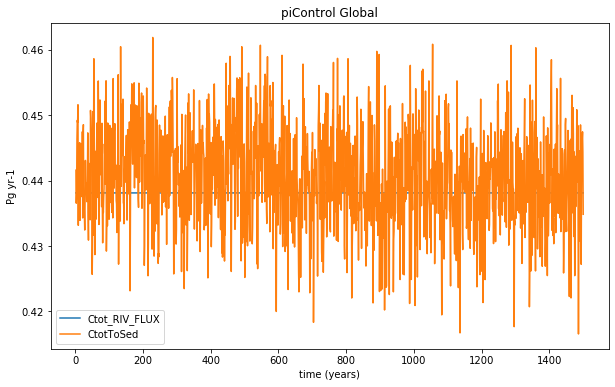

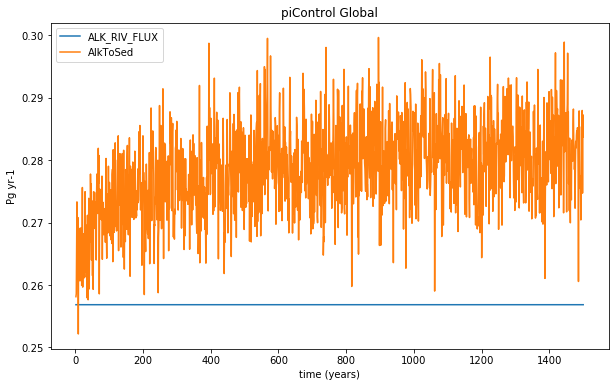

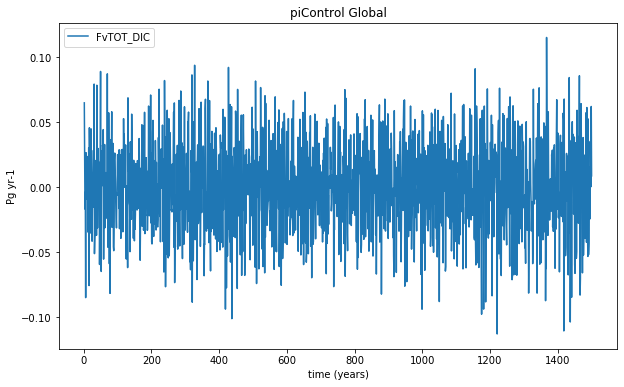

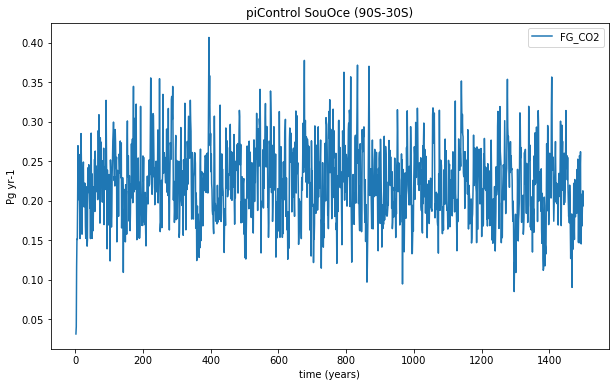

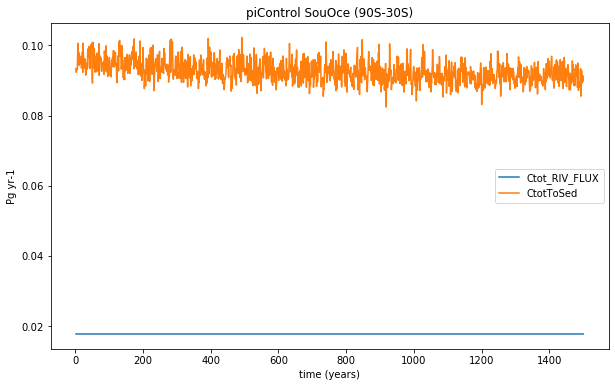

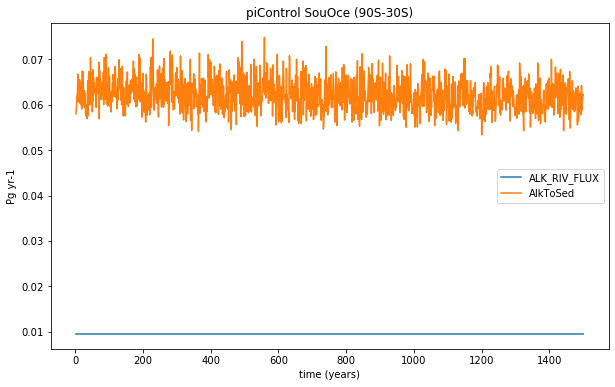

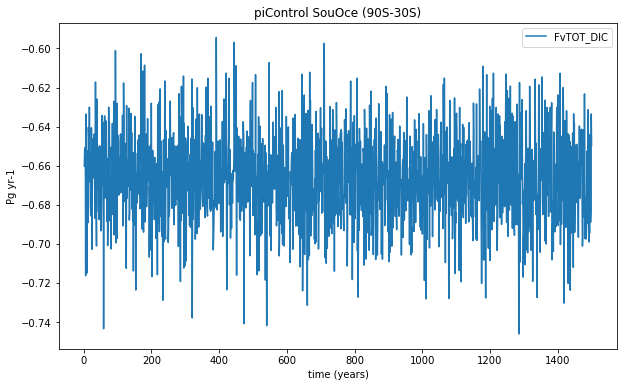

In [4]:
ocean_carbon_balance_summary(experiment='piControl')

<xarray.Dataset>
Dimensions:                   ()
Coordinates:
    region                    <U6 'Global'
Data variables:
    FG_CO2                    float32 -0.060890693
    weight_sum_FG_CO2         float64 3.605e+18
    weight_sum_DIC_RIV_FLUX   float64 3.605e+18
    weight_sum_DOC_RIV_FLUX   float64 3.605e+18
    weight_sum_DOCr_RIV_FLUX  float64 3.605e+18
    ALK_RIV_FLUX              float32 0.25683784
    weight_sum_ALK_RIV_FLUX   float64 3.605e+18
    weight_sum_pocToSed       float64 3.605e+18
    weight_sum_calcToSed      float64 3.605e+18
    weight_sum_FvPER_DIC      float64 3.605e+18
    weight_sum_FvICE_DIC      float64 3.605e+18
    weight_sum_FvPER_ALK      float64 3.605e+18
    weight_sum_FvICE_ALK      float64 3.605e+18
    Ctot_RIV_FLUX             float32 0.4381104
    CtotToSed                 float32 0.4393101
    AlkToSed                  float32 0.27181056
    FvTOT_DIC                 float32 -0.00021485046
    FvTOT_ALK                 float32 -0.00024590312

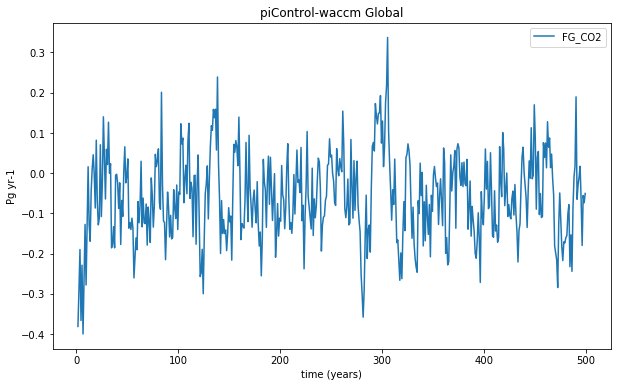

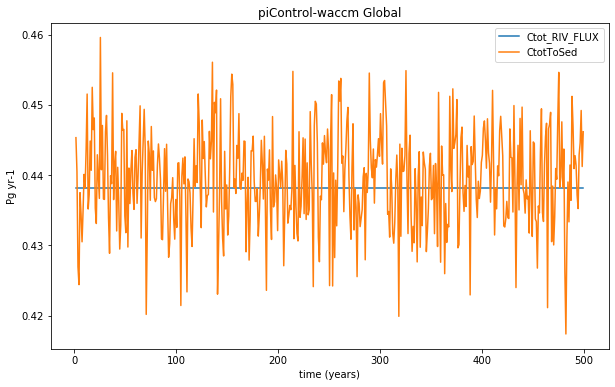

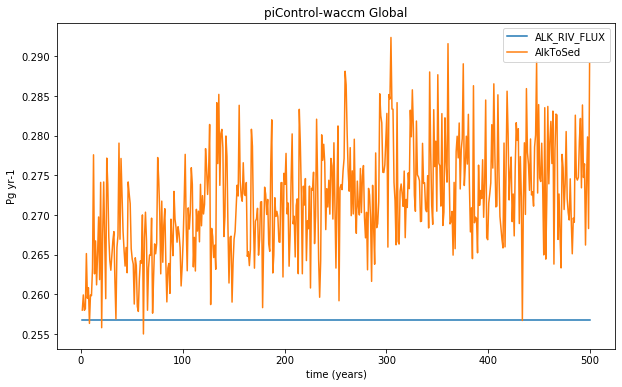

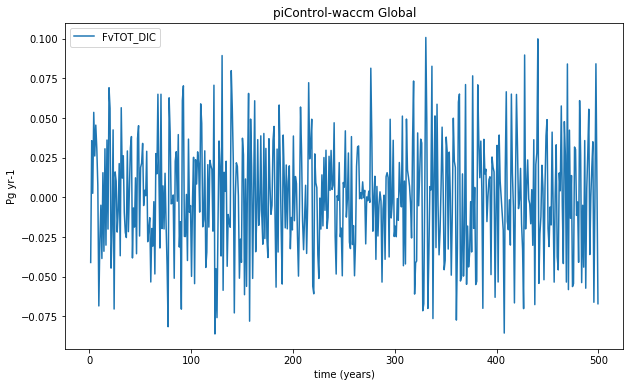

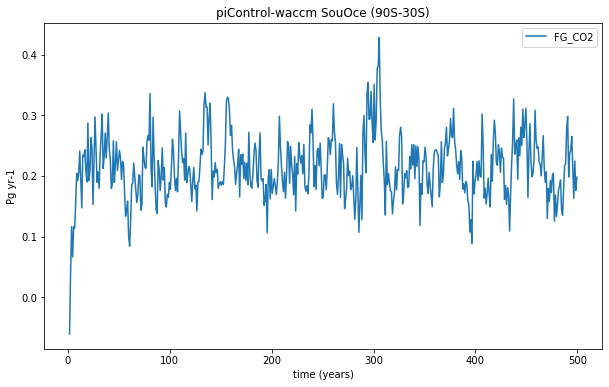

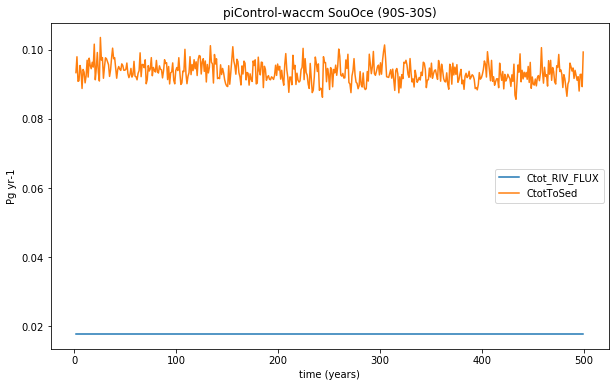

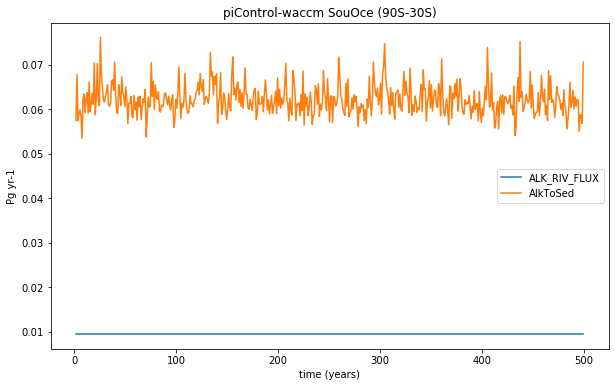

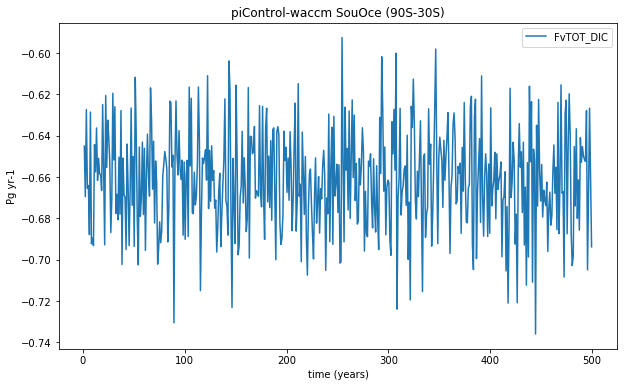

In [5]:
ocean_carbon_balance_summary(experiment='piControl-waccm')

<xarray.Dataset>
Dimensions:                   ()
Coordinates:
    region                    <U6 'Global'
Data variables:
    FG_CO2                    float32 -0.013372711
    weight_sum_FG_CO2         float64 3.605e+18
    weight_sum_DIC_RIV_FLUX   float64 3.605e+18
    weight_sum_DOC_RIV_FLUX   float64 3.605e+18
    weight_sum_DOCr_RIV_FLUX  float64 3.605e+18
    ALK_RIV_FLUX              float32 0.25683782
    weight_sum_ALK_RIV_FLUX   float64 3.605e+18
    weight_sum_pocToSed       float64 3.605e+18
    weight_sum_calcToSed      float64 3.605e+18
    weight_sum_FvPER_DIC      float64 3.605e+18
    weight_sum_FvICE_DIC      float64 3.605e+18
    weight_sum_FvPER_ALK      float64 3.605e+18
    weight_sum_FvICE_ALK      float64 3.605e+18
    Ctot_RIV_FLUX             float32 0.4381104
    CtotToSed                 float32 0.43953344
    AlkToSed                  float32 0.27977493
    FvTOT_DIC                 float32 -0.00047490414
    FvTOT_ALK                 float32 -0.0005435491

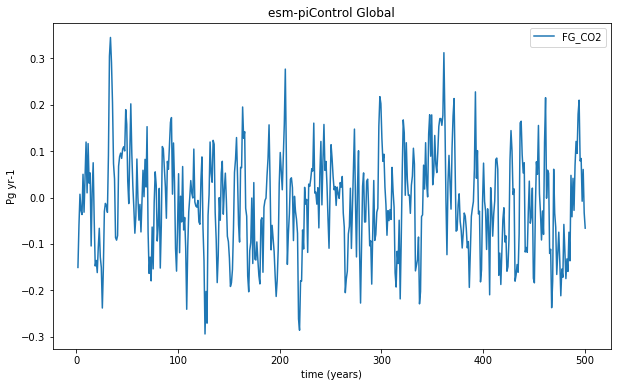

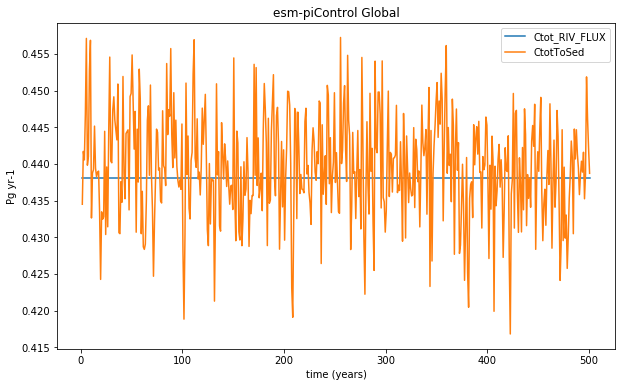

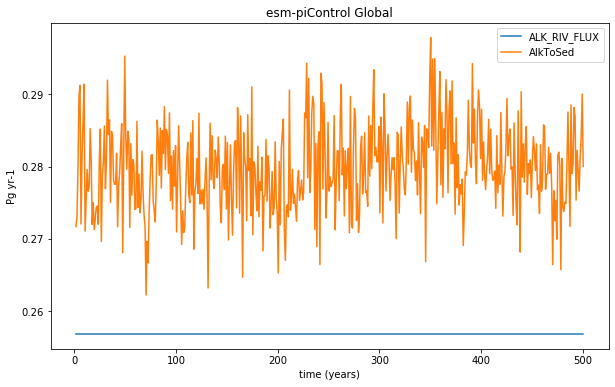

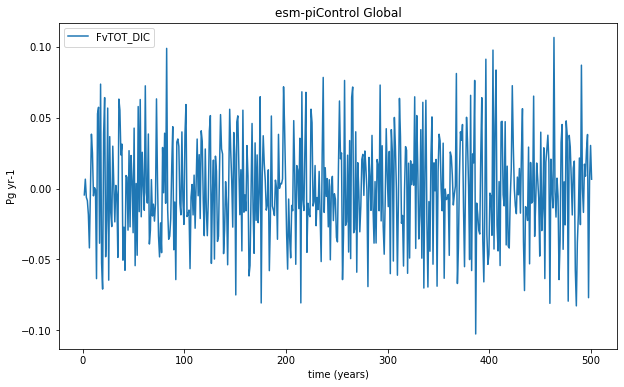

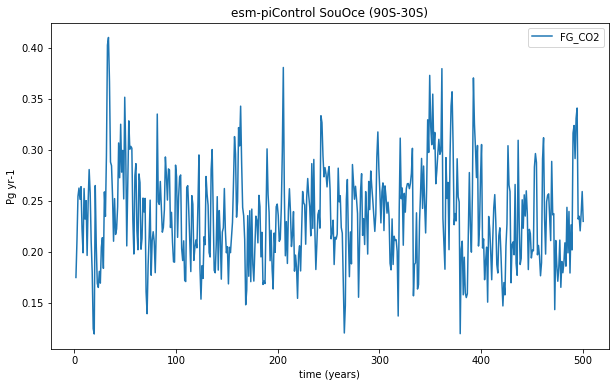

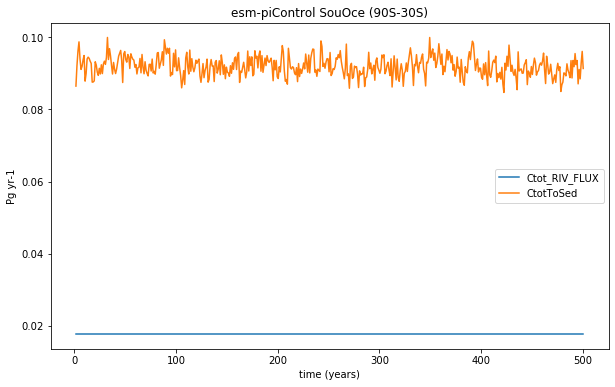

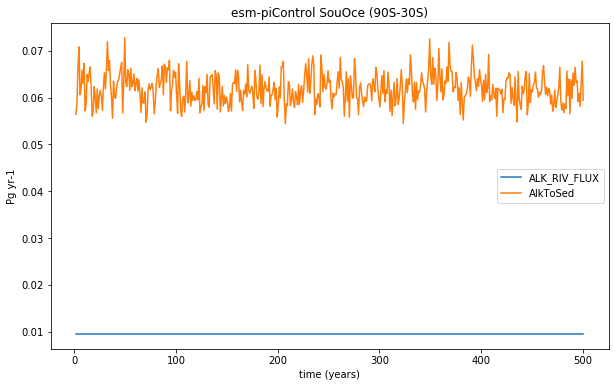

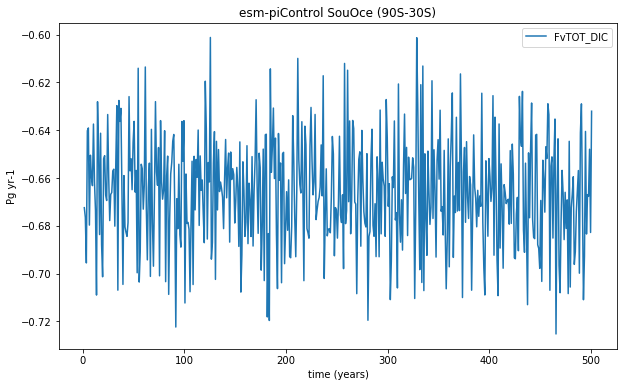

In [6]:
ocean_carbon_balance_summary(experiment='esm-piControl')

<xarray.Dataset>
Dimensions:                   ()
Coordinates:
    region                    <U6 'Global'
Data variables:
    FG_CO2                    float32 -0.074440755
    weight_sum_FG_CO2         float64 3.605e+18
    weight_sum_DIC_RIV_FLUX   float64 3.605e+18
    weight_sum_DOC_RIV_FLUX   float64 3.605e+18
    weight_sum_DOCr_RIV_FLUX  float64 3.605e+18
    ALK_RIV_FLUX              float32 0.25683782
    weight_sum_ALK_RIV_FLUX   float64 3.605e+18
    weight_sum_pocToSed       float64 3.605e+18
    weight_sum_calcToSed      float64 3.605e+18
    weight_sum_FvPER_DIC      float64 3.605e+18
    weight_sum_FvICE_DIC      float64 3.605e+18
    weight_sum_FvPER_ALK      float64 3.605e+18
    weight_sum_FvICE_ALK      float64 3.605e+18
    Ctot_RIV_FLUX             float32 0.4381104
    CtotToSed                 float32 0.41670978
    AlkToSed                  float32 0.27170646
    FvTOT_DIC                 float32 -0.00042234984
    FvTOT_ALK                 float32 -0.0004833946

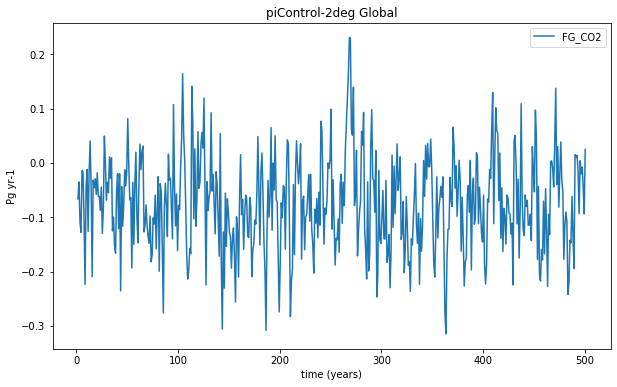

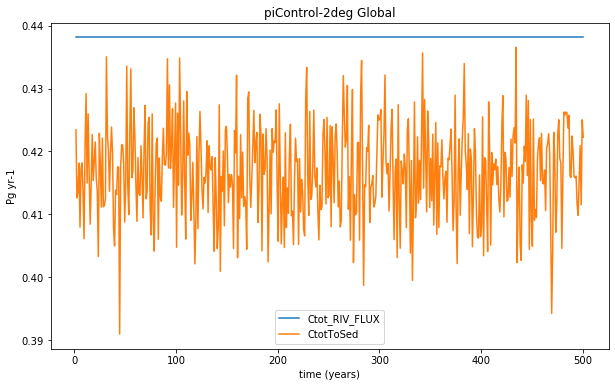

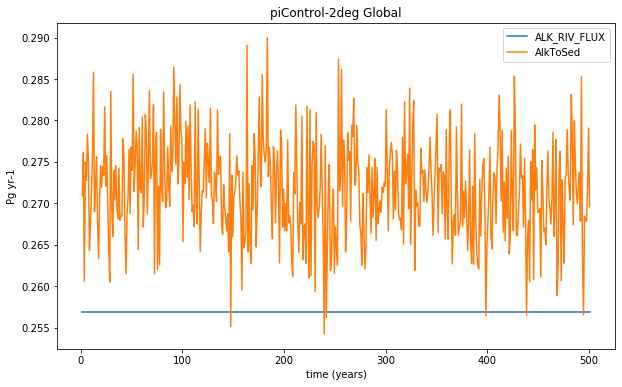

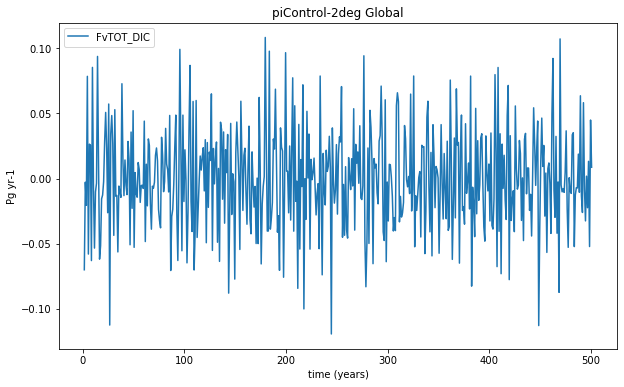

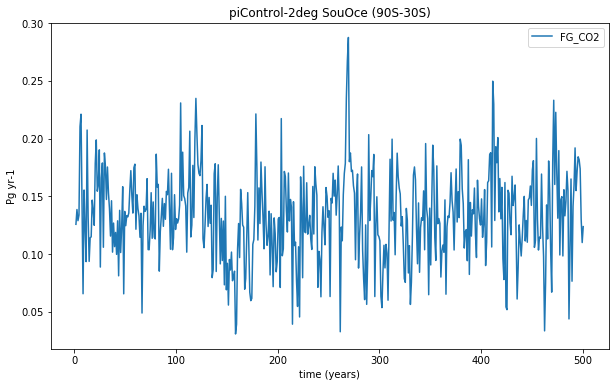

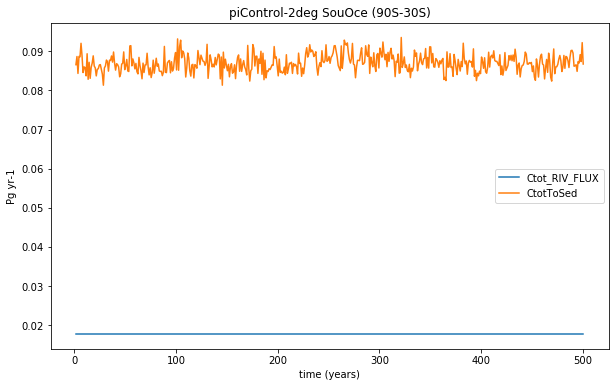

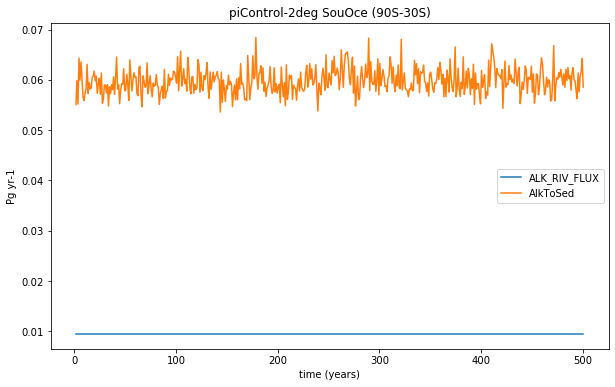

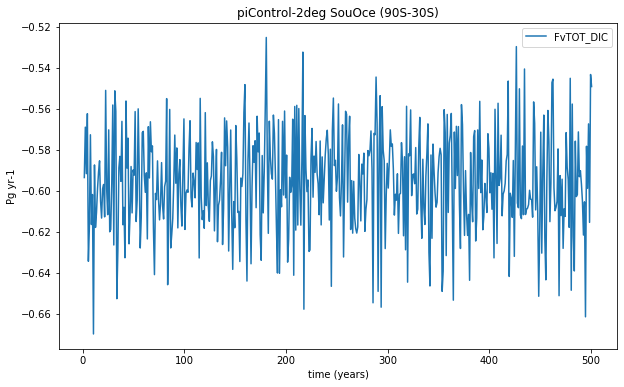

In [7]:
ocean_carbon_balance_summary(experiment='piControl-2deg')